In [1]:
%run /home/analysis_user/New_trap_code/Tools/basic_packages.py
from matplotlib.ticker import MaxNLocator


plt.rcParams["figure.figsize"] = (16,12)
plt.rcParams["font.size"] = 24
plt.rcParams['xtick.labelsize'] = "small"
plt.rcParams['ytick.labelsize'] = 36

## Get the scale

In [2]:
ll = likelihood_analyser.LikelihoodAnalyser()
bandwidth = 2
decimate = 10
drive_freq = 71
fsamp = 5000
def get_scale(i,phase="sin"):
    calibrationFile = step_cal_files[i]       
    calibFreqs = np.fft.rfftfreq(len(calibrationFile.electrode_data[0]), d=1./5000)
    fft_angles = np.angle(np.fft.rfft(calibrationFile.electrode_data[0]))
    if(phase=="cos"):
        phaseResponse = (fft_angles[calibFreqs==drive_freq])%(2*np.pi)
    elif(phase=="sin"):
        phaseResponse = (fft_angles[calibFreqs==drive_freq]+np.pi/2)%(2*np.pi)

    print(phaseResponse,np.std(calibrationFile.electrode_data[0])*np.sqrt(2))

    fit_kwargs = {'A': 0, 'f': drive_freq, 'phi': phaseResponse, 
                  'error_A': 1, 'error_f': 1, 'error_phi': 0.5, 'errordef': 1,
                  'limit_phi': [-2 * np.pi, 2 * np.pi], 
                  'limit_A': [-1, 1], 
                  'print_level': 0, 'fix_f': True, 'fix_phi': True}

    frequency = fit_kwargs['f']

    b, a = signal.butter(3, [2.*(drive_freq-bandwidth/2.)/fsamp, 2.*(drive_freq+bandwidth/2.)/fsamp ], btype = 'bandpass')
    xx2 = signal.filtfilt(b, a, calibrationFile.x2)[::decimate]
    
    m1_tmp = ll.find_mle_sin(xx2, fsamp=5000/decimate, noise_rms=1, plot=False, suppress_print=True, **fit_kwargs)
    
    return m1_tmp.values[0]

In [3]:
step_cal_dir = r'/data/new_trap/20210622/bead1/Discharge/FineDischarge/'
step_cal_files = load_dir(step_cal_dir, start_file=300)

100%|██████████| 280/280 [00:01<00:00, 155.68it/s]

580  files in folder
280  files loaded


In [4]:
dischargeAmps = []
for i in range(len(step_cal_files)):
    print(i,'/',len(step_cal_files))
    dischargeAmps.append(get_scale(i))

0 / 280
[0.08190331] 9.996283880412916
1 / 280
[0.08190909] 9.996281304225382
2 / 280
[0.08189878] 9.996281537733502
3 / 280
[0.08188683] 9.996288002004473
4 / 280
[0.08188301] 9.996283855239406
5 / 280
[0.0818812] 9.996280896041402
6 / 280
[0.08188132] 9.996280781109695
7 / 280
[0.08187602] 9.996281466488083
8 / 280
[0.08187166] 9.996283836062767
9 / 280
[0.08186824] 9.99628049649982
10 / 280
[0.08185259] 9.99628122742368
11 / 280
[0.08184229] 9.996278292760515
12 / 280
[0.08184375] 9.9962872679154
13 / 280
[0.08185011] 9.996282311106809
14 / 280
[0.08185688] 9.996282232848417
15 / 280
[0.08187448] 9.99628608262862
16 / 280
[0.0818733] 9.996285608676523
17 / 280
[0.08187297] 9.996284865507036
18 / 280
[0.08186803] 9.996282915362116
19 / 280
[0.08185791] 9.996282562713075
20 / 280
[0.08185112] 9.996280282430336
21 / 280
[0.08186028] 9.996284879184568
22 / 280
[0.08187175] 9.99628085579499
23 / 280
[0.08186014] 9.996283020975962
24 / 280
[0.08186719] 9.996287090219038
25 / 280
[0.081872

214 / 280
[0.08190371] 9.996283979268693
215 / 280
[0.08190964] 9.996278217408733
216 / 280
[0.08190812] 9.996281835959412
217 / 280
[0.08189192] 9.996278896802057
218 / 280
[0.08189368] 9.996275926505898
219 / 280
[0.08190671] 9.996279128442351
220 / 280
[0.08179691] 9.99627468897426
221 / 280
[0.08182042] 9.99627516703645
222 / 280
[0.08180523] 9.99627521228304
223 / 280
[0.08181146] 9.99627824130788
224 / 280
[0.08183009] 9.996278267050043
225 / 280
[0.08180829] 9.996275926682001
226 / 280
[0.08182235] 9.996279022607434
227 / 280
[0.08182145] 9.996281920292775
228 / 280
[0.08182219] 9.99628283021442
229 / 280
[0.08184658] 9.996279959458805
230 / 280
[0.08186107] 9.996278940572699
231 / 280
[0.08185479] 9.996280217483479
232 / 280
[0.0818335] 9.996273964556677
233 / 280
[0.08184075] 9.99627808392072
234 / 280
[0.08184671] 9.996280048447549
235 / 280
[0.0818646] 9.996273892287004
236 / 280
[0.08186131] 9.99627225841259
237 / 280
[0.08186464] 9.996274749993654
238 / 280
[0.08185296] 9.

In [5]:
scaleX = np.abs(np.mean(dischargeAmps[180:200]))
scaleY = scaleX*-1.0502 # from discharge values in x and y
print("Scale is ", scaleY)
dischargeVoltage = np.std(step_cal_files[-1].electrode_data[0])*np.sqrt(2)
print("voltage: ", dischargeVoltage)

Scale is  -3.542952205750171e-05
voltage:  9.996282495738035


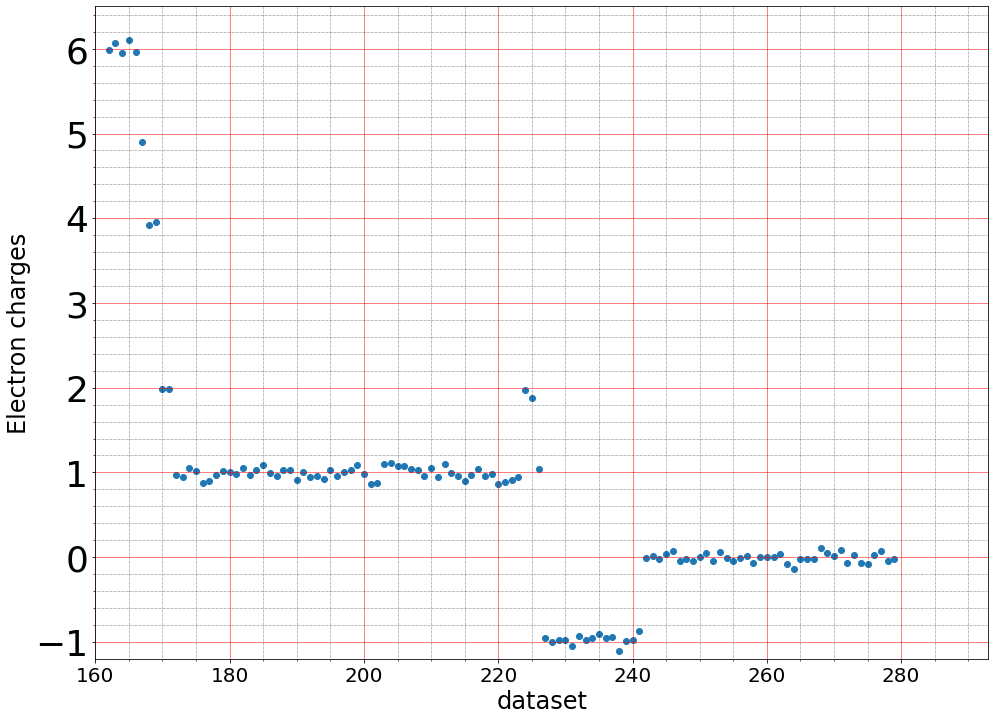

In [6]:
# amps = np.array(amps)
dischargeAmpArr = np.array(dischargeAmps)
_,ax = plt.subplots(figsize=(16,12))
# scale = 326.26

# Perrinf
ax.scatter(range(len(dischargeAmpArr)), dischargeAmpArr/scaleX, label='fit phase')
# ax.scatter(range(len(amps3)), amps3/scale, label='fit fixed-phases')

ax.set(xlabel='dataset', ylabel='Electron charges', ylim=(-1.2,6.5), xlim=(160,None))
ax.grid(axis='y')
ax.minorticks_on()
ax.grid(which='major', linestyle='-', linewidth='0.5', color='red')
ax.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
# ax.legend()
ax.yaxis.set_major_locator(MaxNLocator(integer=True))

In [7]:

def get_response_at_first(i,folder):
    phaseCalib1 = -0.0563 # where from?
    # phase_calib = -0.0442
    drive_freq1=71
    fname = folder + 'Discharge_'+str(i)+'.h5'
    if(i==1):print(fname)
    neutralityFile = BeadDataFile.BeadDataFile(fname=fname)
    fit_kwargs = {'A': 0, 'f': drive_freq1, 'phi': phaseCalib1, 
                  'error_A': 1, 'error_f': 1, 'error_phi': 0.5, 'errordef': 1,
                  'limit_phi': [-2 * np.pi, 2 * np.pi], 
                  'limit_A': [-1, 1], 
                  'print_level': 0, 'fix_f': True, 'fix_phi': True}
    
    b, a = signal.butter(3, [2.*(drive_freq1-bandwidth/2.)/fsamp, 2.*(drive_freq1+bandwidth/2.)/fsamp ], btype = 'bandpass')
    xx2 = signal.filtfilt(b, a, neutralityFile.y2)[::decimate]
    
    m1_tmp = ll.find_mle_sin(xx2, fsamp=5000/decimate, noise_rms=1, plot=False, suppress_print=True, **fit_kwargs)
    
    return m1_tmp.values[0]

In [8]:
def get_response_at_second(i,folder):
    phaseCalib2 = -0.0563+np.pi/2 # where from?
    # phase_calib = -0.0442
    drive_freq2=71*2
    fname = folder + 'Discharge_'+str(i)+'.h5'
    if(i==1):print(fname)
    neutralityFile = BeadDataFile.BeadDataFile(fname=fname)
    fit_kwargs = {'A': 0, 'f': drive_freq2, 'phi': phaseCalib2, 
                  'error_A': 1, 'error_f': 1, 'error_phi': 0.5, 'errordef': 1,
                  'limit_phi': [-2 * np.pi, 2 * np.pi], 
                  'limit_A': [-1, 1], 
                  'print_level': 0, 'fix_f': True, 'fix_phi': True}
    
    b, a = signal.butter(3, [2.*(drive_freq2-bandwidth/2.)/fsamp, 2.*(drive_freq2+bandwidth/2.)/fsamp ], btype = 'bandpass')
    xx2 = signal.filtfilt(b, a, neutralityFile.y2)[::decimate]
    
    m1_tmp = ll.find_mle_sin(xx2, fsamp=5000/decimate, noise_rms=1, plot=False, suppress_print=True, **fit_kwargs)
    
    return m1_tmp.values[0]

In [9]:
def get_voltage(folder):    
    i=0
    trekConvFactor = 200
    fname = folder + 'Discharge_'+str(i)+'.h5'
    neutralityFile = BeadDataFile.BeadDataFile(fname=fname)
    voltage0= np.std(neutralityFile.electrode_data[0])*np.sqrt(2)*trekConvFactor
    voltage1= np.std(neutralityFile.electrode_data[1])*np.sqrt(2)*trekConvFactor
    bias = np.mean(neutralityFile.electrode_data[0])*200
    print("voltages, bias: ", voltage0, voltage1, bias)
    appliedVoltage=voltage0
    return appliedVoltage

In [10]:
def compare_millicharge(folders,printValues=True,extendedData=False,fileNo=1000):
    dataDiffList = []
    
    for folder in folders:
        appliedVoltage=get_voltage(folder)
        ampsNeutralityData0 = np.array(Parallel(n_jobs=24)(delayed(get_response_at_first)(i,folder) for i in tqdm(range(fileNo))))
        data0 = ampsNeutralityData0/scaleY*dischargeVoltage/appliedVoltage
        data0Plus=data0[::2]
        data0Minus=data0[1::2]

        data0PlusMean=np.mean(data0Plus)
        data0MinusMean=np.mean(data0Minus)
        data0PlusStd= np.std(data0Plus)/np.sqrt(len(data0Plus))
        data0MinusStd=np.std(data0Minus)/np.sqrt(len(data0Minus))

        data0Diff=np.mean(data0Minus)*0.85+np.mean(data0Plus)
    
        if(printValues==True):
            print(folder)
            print('mean+: ',data0PlusMean , 'std: ',data0PlusStd)
            print('mean-: ',data0MinusMean , 'std: ',data0MinusStd )
            print("A:",data0Diff)
            print(r"A/$\Delta_\epsilon$ (+,-):", data0Diff/data0PlusStd, data0Diff/data0MinusStd)            
        dataDiffList.append([data0Diff,data0Diff/data0PlusStd,data0Diff/data0MinusStd])
        
    return dataDiffList

In [12]:
folder1 = r'/data/new_trap/20210622/bead1/Neutrality2/Y_alternate_50V_71Hz_height_4_spin_46kHz_files_1000/'
folder2 = r'/data/new_trap/20210622/bead1/Neutrality2/Y_alternate_50V_71Hz_height_4_spin_46kHz_files_1000_2/'
folder3 = r'/data/new_trap/20210622/bead1/Neutrality2/Y_alternate_50V_71Hz_height_-1_spin_46kHz_files_1000/'

heightRepFolder=[folder1,folder2,folder3]
resultsHeightRep = compare_millicharge(heightRepFolder)


 10%|▉         | 96/1000 [00:00<00:01, 862.88it/s]

voltages, bias:  50.02201000314799 0.3538327998096452 0.38185540401167445


 10%|▉         | 96/1000 [00:00<00:01, 763.07it/s]

/data/new_trap/20210622/bead1/Neutrality2/Y_alternate_50V_71Hz_height_4_spin_46kHz_files_1000/
mean+:  -0.001034571408652779 std:  0.0007797865481046505
mean-:  0.003405132601237706 std:  0.0007988534203594488
A: 0.001859791302399271
A/$\Delta_\epsilon$ (+,-): 2.385000493942452 2.3280757833676757
voltages, bias:  50.022316290575276 0.3539477734854469 0.38207123280406513


 10%|▉         | 96/1000 [00:00<00:00, 958.02it/s]

/data/new_trap/20210622/bead1/Neutrality2/Y_alternate_50V_71Hz_height_4_spin_46kHz_files_1000_2/
mean+:  -0.0023955980365219427 std:  0.0007602911737286279
mean-:  0.0029029993399764314 std:  0.0008205549931756226
A: 7.195140245802416e-05
A/$\Delta_\epsilon$ (+,-): 0.09463664046651935 0.08768626485296942
voltages, bias:  50.022235919477 0.35395503150155033 0.38130549094096433


100%|██████████| 1000/1000 [00:01<00:00, 733.37it/s]


/data/new_trap/20210622/bead1/Neutrality2/Y_alternate_50V_71Hz_height_-1_spin_46kHz_files_1000/
mean+:  -0.0024106673352310396 std:  0.0007490136519744011
mean-:  0.003572801442850131 std:  0.0007991690440318249
A: 0.000626213891191572
A/$\Delta_\epsilon$ (+,-): 0.8360513717485272 0.7835812659012785


In [13]:
folder1 = r'/data/new_trap/20210622/bead1/Neutrality2/Y_alternate_50V_71Hz_height_4_spin_46kHz_files_1000/'
folder2 = r'/data/new_trap/20210622/bead1/Neutrality2/Y_alternate_100V_71Hz_height_4_spin_46kHz_files_1000/'

comp50V100VFolder=[folder1,folder2]
results50V100V = compare_millicharge(comp50V100VFolder)


 10%|▉         | 96/1000 [00:00<00:01, 775.24it/s]

voltages, bias:  50.02201000314799 0.3538327998096452 0.38185540401167445


 10%|▉         | 96/1000 [00:00<00:01, 736.57it/s]

/data/new_trap/20210622/bead1/Neutrality2/Y_alternate_50V_71Hz_height_4_spin_46kHz_files_1000/
mean+:  -0.001034571408652779 std:  0.0007797865481046505
mean-:  0.003405132601237706 std:  0.0007988534203594488
A: 0.001859791302399271
A/$\Delta_\epsilon$ (+,-): 2.385000493942452 2.3280757833676757
voltages, bias:  100.0237408198613 0.354111535498017 0.3880918047778578


100%|██████████| 1000/1000 [00:01<00:00, 889.85it/s]


/data/new_trap/20210622/bead1/Neutrality2/Y_alternate_100V_71Hz_height_4_spin_46kHz_files_1000/
mean+:  -0.002513184964511416 std:  0.00039320792125103256
mean-:  0.0036935110660316203 std:  0.00040889170692022503
A: 0.0006262994416154611
A/$\Delta_\epsilon$ (+,-): 1.5927945694044596 1.5317000345464389


In [15]:
folder1 = r'/data/new_trap/20210622/bead1/Neutrality2/Y_alternate_20V_71Hz_height_0_spin_46kHz_files_5000/'
folder2 = r'/data/new_trap/20210622/bead1/Neutrality2/Y_alternate_150V_71Hz_height_0_spin_46kHz_files_1000/'
folder3 = r'/data/new_trap/20210622/bead1/Neutrality2/Y_alternate_200V_71Hz_height_0_spin_46kHz_files_5000/'

longMeasFolder=[folder1,folder2,folder3]
resultsLong = compare_millicharge(longMeasFolder,fileNo=2000)

  5%|▍         | 96/2000 [00:00<00:02, 720.36it/s]

voltages, bias:  20.017053026058893 0.353947973963061 0.37772059261273727


  5%|▍         | 96/2000 [00:00<00:02, 767.95it/s]

/data/new_trap/20210622/bead1/Neutrality2/Y_alternate_20V_71Hz_height_0_spin_46kHz_files_5000/
mean+:  -0.004124952400124775 std:  0.0013203987786425044
mean-:  0.0042990418754278855 std:  0.0013237919060973208
A: -0.0004707668060110722
A/$\Delta_\epsilon$ (+,-): -0.35653380904749493 -0.3556199458863159
voltages, bias:  150.03945536820794 0.3540403000511779 0.3897744082685093


  5%|▍         | 96/2000 [00:00<00:02, 701.70it/s]

/data/new_trap/20210622/bead1/Neutrality2/Y_alternate_150V_71Hz_height_0_spin_46kHz_files_1000/
mean+:  -0.002202562376275653 std:  0.00020478466035280565
mean-:  0.0030539776574791664 std:  0.00022162515325316673
A: 0.00039331863258163825
A/$\Delta_\epsilon$ (+,-): 1.9206449931553655 1.774702134700129
voltages, bias:  200.04697042209622 0.354010050178249 0.3771732010445046


100%|██████████| 2000/2000 [00:02<00:00, 751.06it/s]


/data/new_trap/20210622/bead1/Neutrality2/Y_alternate_200V_71Hz_height_0_spin_46kHz_files_5000/
mean+:  -0.001877793363647357 std:  0.00016329472293716532
mean-:  -6.457886181738967e-05 std:  0.00012178003272128753
A: -0.0019326853961921383
A/$\Delta_\epsilon$ (+,-): -11.83556554326512 -15.87029788877942


In [16]:
folder1 = r'/data/new_trap/20210622/bead1/Neutrality2/Y_alternate_150V_71Hz_height_0_spin_46kHz_files_1000/'
folder2 = r'/data/new_trap/20210622/bead1/Neutrality2/Y_alternate_20V_71Hz_height_0_spin_46kHz_files_5000/'

longMeasFolder=[folder1,folder2]
resultsLong = compare_millicharge(longMeasFolder,fileNo=5000)

  3%|▎         | 144/5000 [00:00<00:06, 770.83it/s]

voltages, bias:  150.03945536820794 0.3540403000511779 0.3897744082685093


  2%|▏         | 96/5000 [00:00<00:06, 704.20it/s]

/data/new_trap/20210622/bead1/Neutrality2/Y_alternate_150V_71Hz_height_0_spin_46kHz_files_1000/
mean+:  -0.0022766359258797886 std:  0.00012483423507040625
mean-:  0.003382171129189598 std:  0.0001384658068600886
A: 0.0005982095339313698
A/$\Delta_\epsilon$ (+,-): 4.792031077003683 4.320269007176801
voltages, bias:  20.017053026058893 0.353947973963061 0.37772059261273727


100%|██████████| 5000/5000 [00:07<00:00, 660.44it/s]


/data/new_trap/20210622/bead1/Neutrality2/Y_alternate_20V_71Hz_height_0_spin_46kHz_files_5000/
mean+:  -0.002866793727406291 std:  0.0008095571155381143
mean-:  0.002858968643930856 std:  0.0008021009135656583
A: -0.0004366703800650633
A/$\Delta_\epsilon$ (+,-): -0.5393941597002796 -0.5444082816511072


## Now do the analysis - 2f

In [17]:
def compare_millicharge(folders,printValues=True,extendedData=False,fileNo=1000):
    dataDiffList = []
    
    for folder in folders:
        appliedVoltage=get_voltage(folder)
        ampsNeutralityData0 = np.array(Parallel(n_jobs=24)(delayed(get_response_at_second)(i,folder) for i in tqdm(range(fileNo))))
        data0 = ampsNeutralityData0/scaleY*dischargeVoltage/appliedVoltage
        data0Plus=data0[::2]
        data0Minus=data0[1::2]

        data0PlusMean=np.mean(data0Plus)
        data0MinusMean=np.mean(data0Minus)
        data0PlusStd= np.std(data0Plus)/np.sqrt(len(data0Plus))
        data0MinusStd=np.std(data0Minus)/np.sqrt(len(data0Minus))

        data0Diff=np.mean(data0Minus)*0.85+np.mean(data0Plus)
    
        if(printValues==True):
            print(folder)
            print('mean+: ',data0PlusMean , 'std: ',data0PlusStd)
            print('mean-: ',data0MinusMean , 'std: ',data0MinusStd )
            print("A:",data0Diff)
            print(r"A/$\Delta_\epsilon$ (+,-):", data0Diff/data0PlusStd, data0Diff/data0MinusStd)            
        dataDiffList.append([data0Diff,data0Diff/data0PlusStd,data0Diff/data0MinusStd])
        
    return dataDiffList

### Height reproducibility

In [18]:
folder1 = r'/data/new_trap/20210622/bead1/Neutrality2/Y_alternate_50V_71Hz_height_4_spin_46kHz_files_1000/'
folder2 = r'/data/new_trap/20210622/bead1/Neutrality2/Y_alternate_50V_71Hz_height_4_spin_46kHz_files_1000_2/'
folder3 = r'/data/new_trap/20210622/bead1/Neutrality2/Y_alternate_50V_71Hz_height_-1_spin_46kHz_files_1000/'

heightRepFolder=[folder1,folder2,folder3]
resultsHeightRep = compare_millicharge(heightRepFolder)


 10%|▉         | 96/1000 [00:00<00:01, 742.81it/s]

voltages, bias:  50.02201000314799 0.3538327998096452 0.38185540401167445


  0%|          | 0/1000 [00:00<?, ?it/s]

/data/new_trap/20210622/bead1/Neutrality2/Y_alternate_50V_71Hz_height_4_spin_46kHz_files_1000/
mean+:  -0.0031491632284615947 std:  0.0007098249417567328
mean-:  0.007984997977450344 std:  0.0007559989979713876
A: 0.0036380850523711973
A/$\Delta_\epsilon$ (+,-): 5.125327159351948 4.812288193679442
voltages, bias:  50.022316290575276 0.3539477734854469 0.38207123280406513


 10%|▉         | 96/1000 [00:00<00:01, 832.80it/s]

/data/new_trap/20210622/bead1/Neutrality2/Y_alternate_50V_71Hz_height_4_spin_46kHz_files_1000_2/
mean+:  -0.00422541633957083 std:  0.0007444978622448842
mean-:  0.008256798637656037 std:  0.000705012587507596
A: 0.0027928625024368006
A/$\Delta_\epsilon$ (+,-): 3.7513371684043295 3.961436365711285
voltages, bias:  50.022235919477 0.35395503150155033 0.38130549094096433


100%|██████████| 1000/1000 [00:01<00:00, 738.64it/s]


/data/new_trap/20210622/bead1/Neutrality2/Y_alternate_50V_71Hz_height_-1_spin_46kHz_files_1000/
mean+:  -0.005407245661295305 std:  0.0006867683778290981
mean-:  0.009298574134140843 std:  0.0007039950890015342
A: 0.0024965423527244113
A/$\Delta_\epsilon$ (+,-): 3.63520283303678 3.546249670953274


### 100V vs 50V at height = 4

In [19]:
folder1 = r'/data/new_trap/20210622/bead1/Neutrality2/Y_alternate_50V_71Hz_height_4_spin_46kHz_files_1000/'
folder2 = r'/data/new_trap/20210622/bead1/Neutrality2/Y_alternate_100V_71Hz_height_4_spin_46kHz_files_1000/'

comp50V100VFolder=[folder1,folder2]
results50V100V = compare_millicharge(comp50V100VFolder)


 10%|▉         | 96/1000 [00:00<00:00, 959.07it/s]

voltages, bias:  50.02201000314799 0.3538327998096452 0.38185540401167445


 10%|▉         | 96/1000 [00:00<00:01, 876.73it/s]

/data/new_trap/20210622/bead1/Neutrality2/Y_alternate_50V_71Hz_height_4_spin_46kHz_files_1000/
mean+:  -0.0031491632284615947 std:  0.0007098249417567328
mean-:  0.007984997977450344 std:  0.0007559989979713876
A: 0.0036380850523711973
A/$\Delta_\epsilon$ (+,-): 5.125327159351948 4.812288193679442
voltages, bias:  100.0237408198613 0.354111535498017 0.3880918047778578


100%|██████████| 1000/1000 [00:01<00:00, 933.93it/s]


/data/new_trap/20210622/bead1/Neutrality2/Y_alternate_100V_71Hz_height_4_spin_46kHz_files_1000/
mean+:  -0.008495966732100919 std:  0.0003509067106552054
mean-:  0.015616517875606018 std:  0.00035634881953371095
A: 0.0047780734621641965
A/$\Delta_\epsilon$ (+,-): 13.616363885554314 13.408416698044332


## Long Measurements

In [20]:
folder1 = r'/data/new_trap/20210622/bead1/Neutrality2/Y_alternate_150V_71Hz_height_0_spin_46kHz_files_1000/'
folder2 = r'/data/new_trap/20210622/bead1/Neutrality2/Y_alternate_20V_71Hz_height_0_spin_46kHz_files_5000/'
folder3 = r'/data/new_trap/20210622/bead1/Neutrality2/Y_alternate_200V_71Hz_height_0_spin_46kHz_files_5000/'

longMeasFolder=[folder1,folder2,folder3]
resultsLong = compare_millicharge(longMeasFolder,fileNo=2000)

  5%|▍         | 96/2000 [00:00<00:02, 946.70it/s]

voltages, bias:  150.03945536820794 0.3540403000511779 0.3897744082685093


  5%|▍         | 96/2000 [00:00<00:02, 886.00it/s]

/data/new_trap/20210622/bead1/Neutrality2/Y_alternate_150V_71Hz_height_0_spin_46kHz_files_1000/
mean+:  -0.013738896642328496 std:  0.00015726230417586565
mean-:  0.025815676208207766 std:  0.00015941115445371347
A: 0.008204428134648105
A/$\Delta_\epsilon$ (+,-): 52.170341631730984 51.4670893813164
voltages, bias:  20.017053026058893 0.353947973963061 0.37772059261273727


  5%|▍         | 96/2000 [00:00<00:02, 724.18it/s]

/data/new_trap/20210622/bead1/Neutrality2/Y_alternate_20V_71Hz_height_0_spin_46kHz_files_5000/
mean+:  -0.0013708827382729828 std:  0.00127796265110451
mean-:  0.0008730341576695465 std:  0.0012073805728970866
A: -0.0006288037042538683
A/$\Delta_\epsilon$ (+,-): -0.49203605732171396 -0.5207999187406717
voltages, bias:  200.04697042209622 0.354010050178249 0.3771732010445046


100%|██████████| 2000/2000 [00:02<00:00, 725.51it/s]


/data/new_trap/20210622/bead1/Neutrality2/Y_alternate_200V_71Hz_height_0_spin_46kHz_files_5000/
mean+:  -0.018539504541455525 std:  0.0001243466224428755
mean-:  7.23827820273522e-05 std:  0.000123089674982147
A: -0.018477979176732277
A/$\Delta_\epsilon$ (+,-): -148.60057164175092 -150.11802719775102


In [91]:
voltage=[20,50,100,150,200]
value=[0.5,4.14,13.51,51.81871550652366,-149.35929941975098]

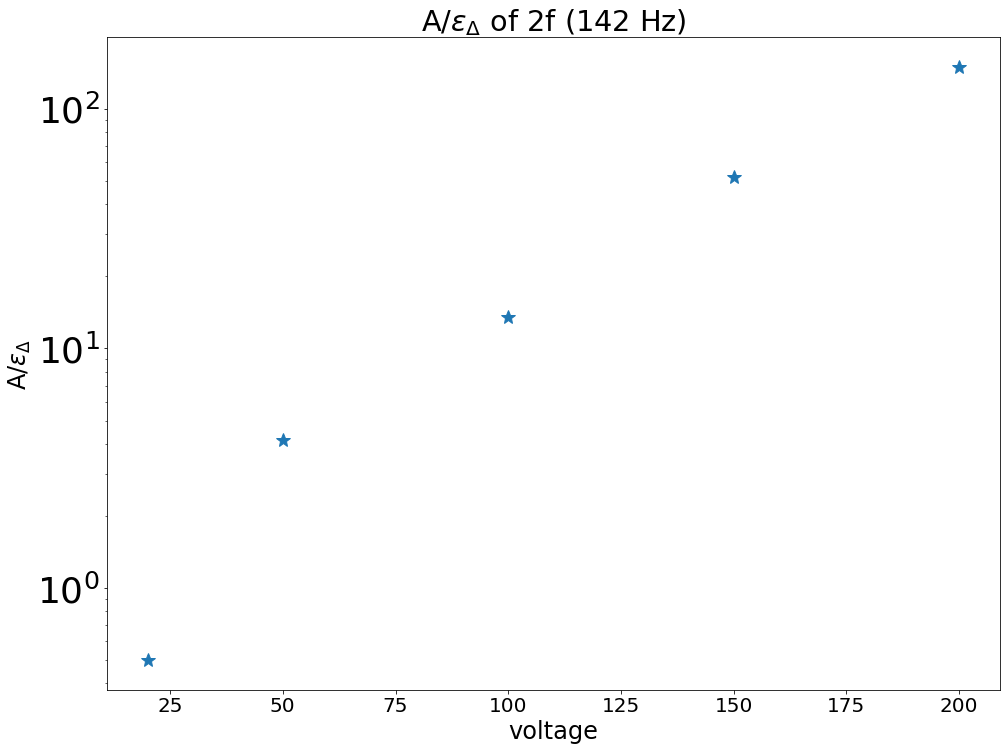

In [104]:
plt.title(r"A/$\epsilon_\Delta$ of 2f (142 Hz)")
plt.plot(voltage,np.abs(value),marker="*",linestyle="",markersize="15")
plt.xlabel("voltage")
plt.ylabel(r"A/$\epsilon_\Delta$")
plt.yscale("log")
plt.show()


In [21]:
def compare_millicharge_AB(folders,printValues=True,extendedData=False,fileNo=1000):
    dataDiffList = []
    for folder in folders:
        appliedVoltage=get_voltage(folder)
        F = np.array(Parallel(n_jobs=24)(delayed(get_response_at_first)(i,folder) for i in tqdm(range(fileNo))))
        G = np.array(Parallel(n_jobs=24)(delayed(get_response_at_second)(i,folder) for i in tqdm(range(fileNo))))

        data0 = F/scaleY*dischargeVoltage/appliedVoltage
        F1=data0[::2]
        F2=data0[1::2]
        
        
        data1 = G/scaleY*dischargeVoltage/appliedVoltage
        G1=data1[::2]
        G2=data1[1::2]

        data0PlusMean=np.mean(F1)
        data0MinusMean=np.mean(F2)
        data0PlusStd= np.std(F1)/np.sqrt(len(F1))
        data0MinusStd=np.std(F2)/np.sqrt(len(F2))
    
        A=data0MinusMean*0.85+data0PlusMean

        data1PlusMean=np.mean(G1)
        data1MinusMean=np.mean(G2)
        data1PlusStd= np.std(G1)/np.sqrt(len(G1))
        data1MinusStd=np.std(G2)/np.sqrt(len(G2))
    
        B=data1MinusMean*0.85**2+data1PlusMean
    
    
        if(printValues==True):
            print(folder)
            print('mean: ',data0PlusMean , 'std: ',data0PlusStd)
            print('mean: ',data0MinusMean , 'std: ',data0MinusStd )
            print('mean: ',data1PlusMean , 'std: ',data1PlusStd)
            print('mean: ',data1MinusMean , 'std: ',data1MinusStd )
            print("A:",A , "B:",B)
            print("dev in std (A,B):", A/np.sqrt(data0PlusStd**2+data0MinusStd**2),  B/np.sqrt(data1PlusStd**2+data1MinusStd**2))            
        dataDiffList.append(A/B)
        
    return dataDiffList

In [156]:
folder1 = r'/data/new_trap/20210622/bead1/Neutrality2/Y_alternate_50V_71Hz_height_4_spin_46kHz_files_1000/'
folder2 = r'/data/new_trap/20210622/bead1/Neutrality2/Y_alternate_50V_71Hz_height_4_spin_46kHz_files_1000_2/'
folder3 = r'/data/new_trap/20210622/bead1/Neutrality2/Y_alternate_50V_71Hz_height_-1_spin_46kHz_files_1000/'

heightRepFolder=[folder1,folder2,folder3]
resultsHeightRep = compare_millicharge_AB(heightRepFolder)





  0%|          | 0/1000 [00:00<?, ?it/s]


 10%|▉         | 96/1000 [00:00<00:01, 718.87it/s]

voltages, bias:  50.02201000314799 0.3538327998096452 0.38185540401167445





 14%|█▍        | 144/1000 [00:00<00:01, 606.89it/s]


 24%|██▍       | 240/1000 [00:00<00:01, 652.65it/s]


 53%|█████▎    | 528/1000 [00:00<00:00, 782.12it/s]


 72%|███████▏  | 720/1000 [00:00<00:00, 810.67it/s]


 91%|█████████ | 912/1000 [00:01<00:00, 820.52it/s]


100%|██████████| 1000/1000 [00:01<00:00, 979.48it/s]


  0%|          | 0/1000 [00:00<?, ?it/s]


 10%|▉         | 96/1000 [00:00<00:01, 853.30it/s]


 24%|██▍       | 240/1000 [00:00<00:00, 842.08it/s]


 34%|███▎      | 336/1000 [00:00<00:00, 801.96it/s]


 53%|█████▎    | 528/1000 [00:00<00:00, 959.64it/s]


 72%|███████▏  | 720/1000 [00:00<00:00, 934.49it/s]


 91%|█████████ | 912/1000 [00:01<00:00, 867.59it/s]


100%|██████████| 1000/1000 [00:01<00:00, 966.47it/s]


  0%|          | 0/1000 [00:00<?, ?it/s]


 10%|▉         | 96/1000 [00:00<00:01, 805.77it/s]

/data/new_trap/20210622/bead1/Neutrality2/Y_alternate_50V_71Hz_height_4_spin_46kHz_files_1000/
mean:  -0.001034571408652779 std:  0.0007797865481046505
mean:  0.003405132601237706 std:  0.0007988534203594488
mean:  -0.0031491632284615947 std:  0.0007098249417567328
mean:  0.007984997977450344 std:  0.0007559989979713876
A: 0.001859791302399271 B: 0.0026199978102462783
dev in std (A,B): 1.6659595064963268 2.5264968014551132
voltages, bias:  50.022316290575276 0.3539477734854469 0.38207123280406513





 24%|██▍       | 240/1000 [00:00<00:00, 806.93it/s]


 53%|█████▎    | 528/1000 [00:00<00:00, 904.65it/s]


 72%|███████▏  | 720/1000 [00:00<00:00, 920.21it/s]


 91%|█████████ | 912/1000 [00:00<00:00, 893.38it/s]


100%|██████████| 1000/1000 [00:00<00:00, 1024.27it/s]


  0%|          | 0/1000 [00:00<?, ?it/s]


 10%|▉         | 96/1000 [00:00<00:01, 836.25it/s]


 24%|██▍       | 240/1000 [00:00<00:00, 844.14it/s]


 53%|█████▎    | 528/1000 [00:00<00:00, 936.77it/s]


 72%|███████▏  | 720/1000 [00:00<00:00, 871.61it/s]


 91%|█████████ | 912/1000 [00:01<00:00, 867.01it/s]


100%|██████████| 1000/1000 [00:01<00:00, 994.39it/s]


  0%|          | 0/1000 [00:00<?, ?it/s]


 10%|▉         | 96/1000 [00:00<00:01, 856.69it/s]

/data/new_trap/20210622/bead1/Neutrality2/Y_alternate_50V_71Hz_height_4_spin_46kHz_files_1000_2/
mean:  -0.0023955980365219427 std:  0.0007602911737286279
mean:  0.0029029993399764314 std:  0.0008205549931756226
mean:  -0.00422541633957083 std:  0.0007444978622448842
mean:  0.008256798637656037 std:  0.000705012587507596
A: 7.195140245802416e-05 B: 0.0017401206761356557
dev in std (A,B): 0.06432048569651833 1.6971176192561068
voltages, bias:  50.022235919477 0.35395503150155033 0.38130549094096433





 14%|█▍        | 144/1000 [00:00<00:01, 667.26it/s]


 24%|██▍       | 240/1000 [00:00<00:01, 696.71it/s]


 53%|█████▎    | 528/1000 [00:00<00:00, 841.25it/s]


 72%|███████▏  | 720/1000 [00:00<00:00, 854.84it/s]


 91%|█████████ | 912/1000 [00:00<00:00, 827.96it/s]


100%|██████████| 1000/1000 [00:00<00:00, 1002.91it/s]


  0%|          | 0/1000 [00:00<?, ?it/s]


 10%|▉         | 96/1000 [00:00<00:01, 574.44it/s]


 34%|███▎      | 336/1000 [00:00<00:00, 685.11it/s]


 53%|█████▎    | 528/1000 [00:00<00:00, 821.20it/s]


 72%|███████▏  | 720/1000 [00:00<00:00, 858.52it/s]


 91%|█████████ | 912/1000 [00:00<00:00, 820.96it/s]


100%|██████████| 1000/1000 [00:00<00:00, 1049.44it/s]

/data/new_trap/20210622/bead1/Neutrality2/Y_alternate_50V_71Hz_height_-1_spin_46kHz_files_1000/
mean:  -0.0024106673352310396 std:  0.0007490136519744011
mean:  0.003572801442850131 std:  0.0007991690440318249
mean:  -0.005407245661295305 std:  0.0006867683778290981
mean:  0.009298574134140843 std:  0.0007039950890015342
A: 0.000626213891191572 B: 0.0013109741506214532
dev in std (A,B): 0.5717256871293142 1.3329766411424704


In [172]:
folder1 = r'/data/new_trap/20210622/bead1/Neutrality2/Y_alternate_20V_71Hz_height_0_spin_46kHz_files_5000/'
folder2 = r'/data/new_trap/20210622/bead1/Neutrality2/Y_alternate_150V_71Hz_height_0_spin_46kHz_files_1000/'
folder3 = r'/data/new_trap/20210622/bead1/Neutrality2/Y_alternate_200V_71Hz_height_0_spin_46kHz_files_5000/'

longMeasFolder=[folder1,folder2,folder3]
resultsLong = compare_millicharge_AB(longMeasFolder,fileNo=4)




  0%|          | 0/4 [00:00<?, ?it/s]


100%|██████████| 4/4 [00:00<00:00, 2931.54it/s]


  0%|          | 0/4 [00:00<?, ?it/s]


100%|██████████| 4/4 [00:00<00:00, 3021.29it/s]


  0%|          | 0/4 [00:00<?, ?it/s]


100%|██████████| 4/4 [00:00<00:00, 3206.04it/s]


  0%|          | 0/4 [00:00<?, ?it/s]


100%|██████████| 4/4 [00:00<00:00, 2687.79it/s]

voltages, bias:  20.017053026058893 0.353947973963061 0.37772059261273727
/data/new_trap/20210622/bead1/Neutrality2/Y_alternate_20V_71Hz_height_0_spin_46kHz_files_5000/
mean:  -0.0382130543606705 std:  0.006156508226394038
mean:  -0.012074684444630456 std:  0.004853081936821156
mean:  0.030314891250784896 std:  0.0030385839120446964
mean:  -0.046356432555710106 std:  0.019996387630496392
A: -0.048476536138606384 B: -0.0031776312707156515
dev in std (A,B): -6.183764990710283 -0.15710675540053656
voltages, bias:  150.03945536820794 0.3540403000511779 0.3897744082685093
/data/new_trap/20210622/bead1/Neutrality2/Y_alternate_150V_71Hz_height_0_spin_46kHz_files_1000/
mean:  0.003940152251802729 std:  0.0035704231259790077
mean:  0.010918913130699148 std:  0.0028376322812599395
mean:  -0.011103566680609873 std:  0.0014314710001802871
mean:  0.02757870148468597 std:  0.0004852752729893411
A: 0.013221228412897006 B: 0.008822045142075737
dev in std (A,B): 2.8989406473768424 5.8366555541799885





  0%|          | 0/4 [00:00<?, ?it/s]


100%|██████████| 4/4 [00:00<00:00, 2334.71it/s]


  0%|          | 0/4 [00:00<?, ?it/s]


100%|██████████| 4/4 [00:00<00:00, 2532.41it/s]

voltages, bias:  200.04697042209622 0.354010050178249 0.3771732010445046
/data/new_trap/20210622/bead1/Neutrality2/Y_alternate_200V_71Hz_height_0_spin_46kHz_files_5000/
mean:  0.009516761866574665 std:  0.0007544140514030756
mean:  0.0026508237961512804 std:  0.0028169165515329908
mean:  -0.025728734692231685 std:  0.0021713855055455838
mean:  -0.0027908573350916024 std:  0.0014583890488420552
A: 0.011769962093303252 B: -0.027745129116835368
dev in std (A,B): 4.036076299409961 -10.607209100999722


In [29]:
resultsLong

[0.6360720296439042, 0.08005786346786539, 0.10454176737408664]

In [30]:
folder1 = r'/data/new_trap/20210622/bead1/Neutrality2/Y_alternate_20V_71Hz_height_0_spin_46kHz_files_5000/'
folder2 = r'/data/new_trap/20210622/bead1/Neutrality2/Y_alternate_150V_71Hz_height_0_spin_46kHz_files_1000/'

longMeasFolder=[folder1,folder2]
resultsLong = compare_millicharge_AB(longMeasFolder,fileNo=5000)

  2%|▏         | 96/5000 [00:00<00:05, 823.63it/s]

voltages, bias:  20.017053026058893 0.353947973963061 0.37772059261273727


  2%|▏         | 96/5000 [00:00<00:05, 841.86it/s]

/data/new_trap/20210622/bead1/Neutrality2/Y_alternate_20V_71Hz_height_0_spin_46kHz_files_5000/
mean:  -0.002866793727406291 std:  0.0008095571155381143
mean:  0.002858968643930856 std:  0.0008021009135656583
mean:  -0.001986406909329704 std:  0.0007971912046181109
mean:  0.002361854567095836 std:  0.000769488090807246
A: -0.0004366703800650633 B: -0.00027996698460296273
dev in std (A,B): -0.383169725737637 -0.2526817215085767
voltages, bias:  150.03945536820794 0.3540403000511779 0.3897744082685093


100%|██████████| 5000/5000 [00:06<00:00, 723.62it/s]


/data/new_trap/20210622/bead1/Neutrality2/Y_alternate_150V_71Hz_height_0_spin_46kHz_files_1000/
mean:  -0.0022766359258797886 std:  0.00012483423507040625
mean:  0.003382171129189598 std:  0.0001384658068600886
mean:  -0.01389101682487462 std:  0.00010003341080926465
mean:  0.02597695369363999 std:  0.00010133715072420929
A: 0.0005982095339313698 B: 0.004877332218780268
dev in std (A,B): 3.208751981586518 34.252498284593315


In [31]:
resultsLong

[1.5597209816876467, 0.12265097128876143]

In [173]:
def compare_millicharge_full_analysis_perFile(folders,printValues=True,extendedData=False,fileNo=2000):
    df = pd.DataFrame()
    i=0
    for folder in folders:   
        i+=1
        appliedVoltage=get_voltage(folder)
        
        F = np.array(Parallel(n_jobs=24)(delayed(get_response_at_first)(i,folder) for i in tqdm(range(fileNo))))
        G = np.array(Parallel(n_jobs=24)(delayed(get_response_at_second)(i,folder) for i in tqdm(range(fileNo))))

        data0 = F/scaleY*dischargeVoltage/appliedVoltage
        F1=data0[::2]
        F2=data0[1::2]

        data1 = G/scaleY*dischargeVoltage/appliedVoltage
        G1=data1[::2]
        G2=data1[1::2]
        
        df["F1_%d" %i] = F1
        df["F2_%d" %i] = F2
        df["G1_%d" %i] = G1
        df["G2_%d" %i] = G2
        df["A_%d"  %i] =  np.add(np.multiply(F2,0.85),F1)
        df["B_%d"  %i] =  np.add(np.multiply(G2,0.85**2),G1)

    return df

In [205]:
folders = [r'/data/new_trap/20210622/bead1/Neutrality2/Y_alternate_20V_71Hz_height_0_spin_46kHz_files_5000/',
            r"/data/new_trap/20210622/bead1/Neutrality2/Relaxation_20210708/40V_norelax/",
    r'/data/new_trap/20210622/bead1/Neutrality2/Y_alternate_150V_71Hz_height_0_spin_46kHz_files_1000/', 
            r'/data/new_trap/20210622/bead1/Neutrality2/Y_alternate_200V_71Hz_height_0_spin_46kHz_files_5000/']

#folders=[ r'/data/new_trap/20210622/bead1/Neutrality2/Y_alternate_50V_71Hz_height_4_spin_46kHz_files_1000/',
#         r'/data/new_trap/20210622/bead1/Neutrality2/Y_alternate_50V_71Hz_height_4_spin_46kHz_files_1000_2/',
#         r'/data/new_trap/20210622/bead1/Neutrality2/Y_alternate_50V_71Hz_height_-1_spin_46kHz_files_1000/']


df =compare_millicharge_full_analysis_perFile(folders,fileNo=1998)




  0%|          | 0/1998 [00:00<?, ?it/s]


  5%|▍         | 96/1998 [00:00<00:02, 731.95it/s]

voltages, bias:  20.017053026058893 0.353947973963061 0.37772059261273727





 12%|█▏        | 240/1998 [00:00<00:02, 774.01it/s]


 17%|█▋        | 336/1998 [00:00<00:02, 745.36it/s]


 22%|██▏       | 432/1998 [00:00<00:02, 714.71it/s]


 26%|██▋       | 528/1998 [00:00<00:02, 692.04it/s]


 31%|███       | 624/1998 [00:00<00:02, 679.91it/s]


 36%|███▌      | 720/1998 [00:01<00:01, 666.77it/s]


 41%|████      | 816/1998 [00:01<00:01, 669.65it/s]


 46%|████▌     | 912/1998 [00:01<00:01, 696.53it/s]


 50%|█████     | 1008/1998 [00:01<00:01, 674.76it/s]


 55%|█████▌    | 1104/1998 [00:01<00:01, 677.10it/s]


 60%|██████    | 1200/1998 [00:01<00:01, 662.44it/s]


 65%|██████▍   | 1296/1998 [00:01<00:01, 667.44it/s]


 70%|██████▉   | 1392/1998 [00:02<00:00, 666.28it/s]


 74%|███████▍  | 1488/1998 [00:02<00:00, 662.02it/s]


 79%|███████▉  | 1584/1998 [00:02<00:00, 656.51it/s]


 84%|████████▍ | 1680/1998 [00:02<00:00, 647.35it/s]


 89%|████████▉ | 1776/1998 [00:02<00:00, 638.51it/s]


 94%|█████████▎| 1872/1998 [00:02<00:00, 647.21it/s]


 98%|█████████▊

voltages, bias:  40.02040319571283 0.09729556162992023 0.3690680976081138





  5%|▍         | 96/1998 [00:00<00:05, 331.95it/s]


  7%|▋         | 144/1998 [00:00<00:09, 197.31it/s]


 10%|▉         | 192/1998 [00:01<00:15, 120.22it/s]


 12%|█▏        | 240/1998 [00:01<00:14, 121.45it/s]


 14%|█▍        | 288/1998 [00:02<00:14, 115.68it/s]


 17%|█▋        | 336/1998 [00:02<00:14, 114.52it/s]


 19%|█▉        | 384/1998 [00:03<00:16, 97.23it/s] 


 22%|██▏       | 432/1998 [00:03<00:15, 104.07it/s]


 24%|██▍       | 480/1998 [00:04<00:13, 110.21it/s]


 26%|██▋       | 528/1998 [00:04<00:13, 111.58it/s]


 29%|██▉       | 576/1998 [00:05<00:14, 100.96it/s]


 31%|███       | 624/1998 [00:05<00:12, 106.04it/s]


 34%|███▎      | 672/1998 [00:06<00:11, 111.46it/s]


 36%|███▌      | 720/1998 [00:06<00:11, 113.42it/s]


 38%|███▊      | 768/1998 [00:06<00:10, 118.91it/s]


 41%|████      | 816/1998 [00:07<00:09, 121.55it/s]


 43%|████▎     | 864/1998 [00:07<00:09, 121.89it/s]


 46%|████▌     | 912/1998 [00:07<00:09, 119.50it/s]


 48%|████▊     | 960/1998 

voltages, bias:  150.03945536820794 0.3540403000511779 0.3897744082685093





  5%|▍         | 96/1998 [00:00<00:06, 301.86it/s]


  7%|▋         | 144/1998 [00:00<00:11, 163.82it/s]


 10%|▉         | 192/1998 [00:01<00:15, 119.66it/s]


 12%|█▏        | 240/1998 [00:02<00:14, 117.59it/s]


 14%|█▍        | 288/1998 [00:02<00:14, 118.23it/s]


 17%|█▋        | 336/1998 [00:02<00:13, 119.76it/s]


 19%|█▉        | 384/1998 [00:03<00:13, 124.14it/s]


 22%|██▏       | 432/1998 [00:03<00:12, 126.01it/s]


 24%|██▍       | 480/1998 [00:03<00:12, 120.09it/s]


 26%|██▋       | 528/1998 [00:04<00:11, 124.77it/s]


 29%|██▉       | 576/1998 [00:04<00:11, 118.68it/s]


 31%|███       | 624/1998 [00:05<00:11, 121.57it/s]


 34%|███▎      | 672/1998 [00:05<00:10, 125.66it/s]


 36%|███▌      | 720/1998 [00:06<00:12, 104.90it/s]


 38%|███▊      | 768/1998 [00:06<00:11, 108.16it/s]


 41%|████      | 816/1998 [00:07<00:14, 79.23it/s] 


 43%|████▎     | 864/1998 [00:07<00:12, 89.68it/s]


 46%|████▌     | 912/1998 [00:08<00:11, 97.69it/s]


 48%|████▊     | 960/1998 [0

voltages, bias:  200.04697042209622 0.354010050178249 0.3771732010445046





  5%|▍         | 96/1998 [00:00<00:05, 375.90it/s]


  7%|▋         | 144/1998 [00:00<00:08, 230.47it/s]


 10%|▉         | 192/1998 [00:00<00:09, 198.27it/s]


 12%|█▏        | 240/1998 [00:01<00:11, 154.23it/s]


 14%|█▍        | 288/1998 [00:01<00:12, 134.35it/s]


 17%|█▋        | 336/1998 [00:02<00:12, 129.57it/s]


 19%|█▉        | 384/1998 [00:02<00:13, 119.53it/s]


 22%|██▏       | 432/1998 [00:03<00:13, 112.57it/s]


 24%|██▍       | 480/1998 [00:03<00:13, 110.17it/s]


 26%|██▋       | 528/1998 [00:04<00:13, 110.65it/s]


 29%|██▉       | 576/1998 [00:04<00:13, 107.06it/s]


 31%|███       | 624/1998 [00:05<00:12, 106.10it/s]


 34%|███▎      | 672/1998 [00:05<00:12, 106.66it/s]


 36%|███▌      | 720/1998 [00:05<00:11, 108.86it/s]


 38%|███▊      | 768/1998 [00:06<00:11, 107.08it/s]


 41%|████      | 816/1998 [00:06<00:11, 105.46it/s]


 43%|████▎     | 864/1998 [00:07<00:11, 101.82it/s]


 46%|████▌     | 912/1998 [00:07<00:09, 108.66it/s]


 48%|████▊     | 960/1998 

In [215]:
print(np.mean(df.B_1),np.mean(df.B_2),np.mean(df.B_3),np.mean(df.B_4))

-0.00071321784322199 -0.0036044092851574747 0.00492787022294888 -0.018482399711610257


In [216]:
print(np.std(df.G1_1),np.std(df.G1_2),np.std(df.G1_3),np.std(df.G1_4))

0.040426975128497085 0.022008054233190542 0.004962209830687866 0.003928452828489371


In [230]:
np.mean(df.A_4)/np.std(df.F1_4)

-0.37460601136422206

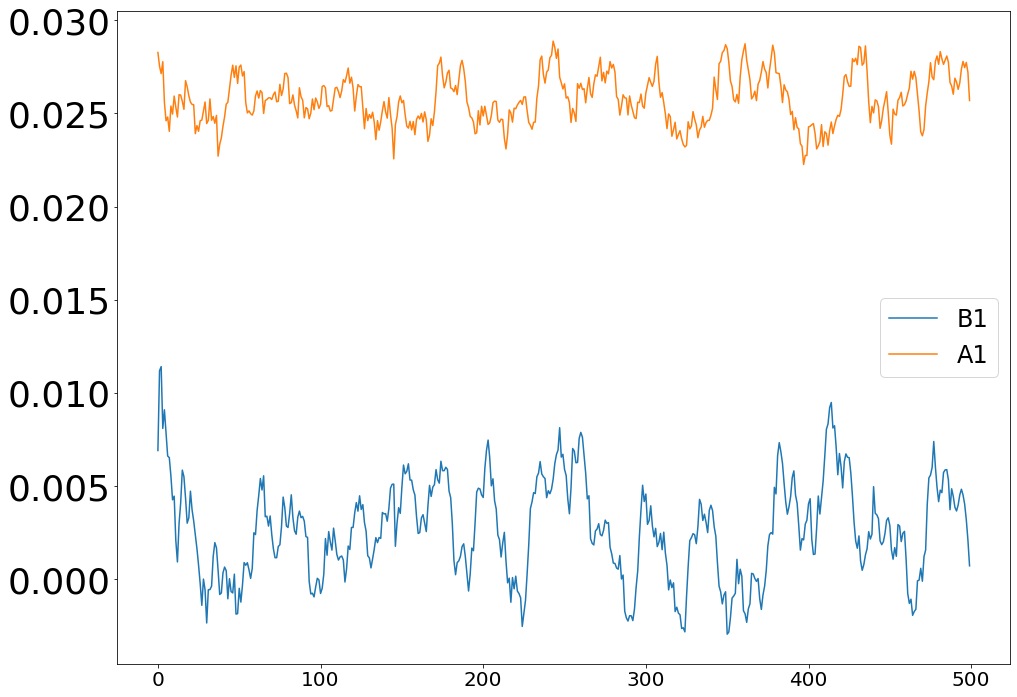

In [198]:
plt.plot(df.F2_2.ewm(span=15,adjust=True).mean(),label="B1")
plt.plot(df.G2_2.ewm(span=15,adjust=True).mean(),label="A1")
#plt.plot(df.A_3.ewm(span=100,adjust=True).mean(),label="A20")
#plt.ylim(-0.01,0.01)
#plt.plot(df.B_200.ewm(span=15,adjust=True).mean(),label="200")
plt.legend()
plt.show()


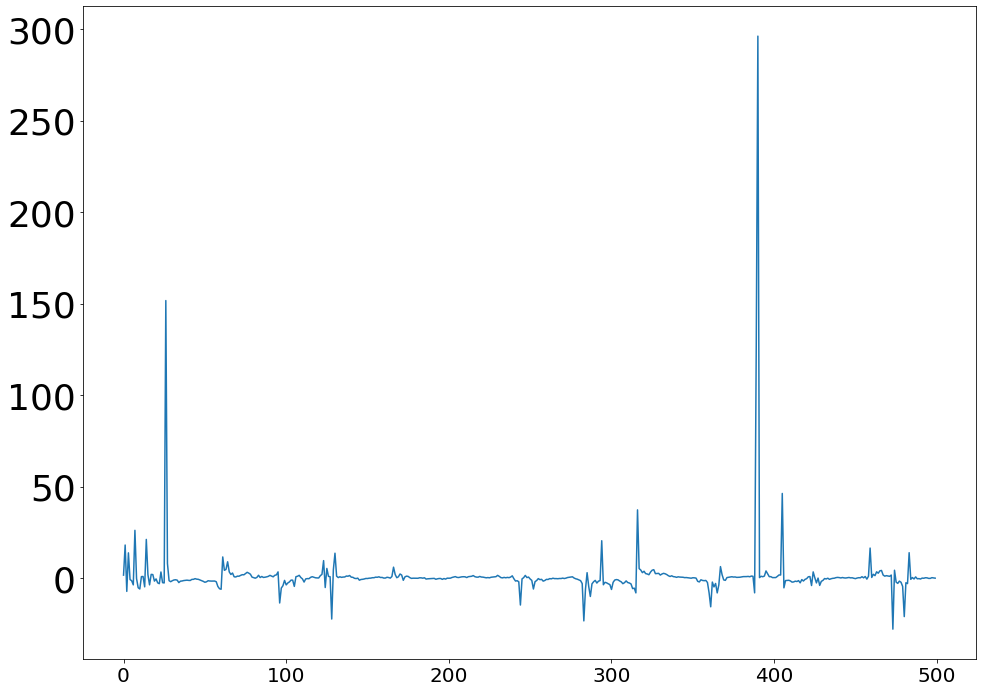

In [180]:
plt.plot(np.divide(df.A_1.ewm(span=50,adjust=True).mean(),df.B_1.ewm(span=50,adjust=True).mean()),label="B20")


In [ ]:
folders = [r'/data/new_trap/20210622/bead1/Neutrality2/Y_alternate_150V_71Hz_height_0_spin_46kHz_files_1000/', 
           r'/data/new_trap/20210622/bead1/Neutrality2/Y_alternate_20V_71Hz_height_0_spin_46kHz_files_5000/']
for folder in folders:
    F1,F2,G1,G2 = compare_millicharge_AB_perFile(folder,fileNo=2000)
    aList = []
    bList = []
    for i in range(1000):
        A=F2[i]*0.85+F1[i]
        B=G2[i]*0.85**2+G1[i]
        aList.append(A)
        bList.append(B)  
    plt.title(folder)    
    plt.plot(aList)
    plt.plot(bList)
    plt.show()

In [ ]:
folders = [r'/data/new_trap/20210622/bead1/Neutrality2/Y_alternate_20V_71Hz_height_0_spin_46kHz_files_5000/',
           r'/data/new_trap/20210622/bead1/Neutrality2/Y_alternate_150V_71Hz_height_0_spin_46kHz_files_1000/',  
           r'/data/new_trap/20210622/bead1/Neutrality2/Y_alternate_200V_71Hz_height_0_spin_46kHz_files_5000/']

for folder in folders:
    F1,F2,G1,G2 = compare_millicharge_AB_perFile(folder,fileNo=2000)
    aList = []
    bList = []
    for i in range(1000):
        A=F2[i]*0.85+F1[i]
        B=G2[i]*0.85**2+G1[i]
        aList.append(A)
        bList.append(B)  
    plt.title(folder)    
    plt.plot(aList)
    plt.plot(bList)
    plt.show()


In [ ]:
folders = [r'/data/new_trap/20210622/bead1/Neutrality2/Y_alternate_20V_71Hz_height_0_spin_46kHz_files_5000/',
    r'/data/new_trap/20210622/bead1/Neutrality2/Y_alternate_150V_71Hz_height_0_spin_46kHz_files_1000/', 
            r'/data/new_trap/20210622/bead1/Neutrality2/Y_alternate_200V_71Hz_height_0_spin_46kHz_files_5000/']

for folder in folders:
    F1,F2,G1,G2 = compare_millicharge_AB_perFile(folder,fileNo=2000)
    aList = []
    bList = []
    for i in range(1000):
        A=F2[i]*0.85+F1[i]
        B=G2[i]*0.85**2+G1[i]
        aList.append(F1[i])
        bList.append(F2[i])  
    plt.title(folder)    
    plt.plot(aList)
    plt.plot(bList)
    plt.show()


In [ ]:
folders = [r'/data/new_trap/20210622/bead1/Neutrality2/Y_alternate_20V_71Hz_height_0_spin_46kHz_files_5000/',
           r'/data/new_trap/20210622/bead1/Neutrality2/Y_alternate_150V_71Hz_height_0_spin_46kHz_files_1000/', 
           r'/data/new_trap/20210622/bead1/Neutrality2/Y_alternate_200V_71Hz_height_0_spin_46kHz_files_5000/']

for folder in folders:
    F1,F2,G1,G2 = compare_millicharge_AB_perFile(folder,fileNo=2000)
    aList = []
    bList = []
    for i in range(1000):
        A=F2[i]*0.85+F1[i]
        B=G2[i]*0.85**2+G1[i]
        aList.append(G1[i])
        bList.append(G2[i])  
    plt.title(folder)    
    plt.plot(aList)
    plt.plot(bList)
    plt.show()
